# Introduction

This notebook is focused on exploratory analysis of a car dataset. As a beginner in the field, it's meant as a structured, practical application of core data analysis skills. The goal is to better understand how various features affect car pricing, and to identify which cars may be considered overpriced based on statistical comparisons.

The analysis uses Python with libraries like Pandas, Seaborn, and Matplotlib. It walks through data cleaning, feature exploration, and visualization. Suggestions and feedback are always welcome.

# Import Libraries and Data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

car_data = pd.read_csv('/kaggle/input/cardataset/data.csv')
car_data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [2]:
car_data.info() # Check data set properties

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [3]:
car_data.isnull().sum()[car_data.isnull().sum() > 0] # Count only columns with missing values

Engine Fuel Type       3
Engine HP             69
Engine Cylinders      30
Number of Doors        6
Market Category     3742
dtype: int64

# **Data Cleaning and Imputation**

In [4]:
# Manual imputation of missing values

car_data.loc[(car_data['Make'] == 'Suzuki') & (car_data['Model'] == 'Verona') & (car_data['Engine Fuel Type'].isnull()), 'Engine Fuel Type'] = 'regular unleaded'
car_data.loc[(car_data['Make'] == 'Tesla') & (car_data['Model'] == 'Model S') & (car_data['Number of Doors'].isnull()), 'Number of Doors'] = 4
car_data.loc[(car_data['Make'] == 'Ferrari') & (car_data['Model'] == 'FF') & (car_data['Number of Doors'].isnull()), 'Number of Doors'] = 2
car_data.loc[car_data['Engine Cylinders'].isnull(), 'Engine Cylinders'] = 0

In [5]:
# Imputation by grouped logic for Engine HP

car_data['Engine HP'] = car_data.groupby(['Make', 'Model', 'Engine Fuel Type'])['Engine HP'].transform(lambda x: x.fillna(x.mean()))
car_data['Engine HP'] = car_data.groupby(['Make', 'Model'])['Engine HP'].transform(lambda x: x.fillna(x.mean()))

# Manual imputation of remaining missing values for Engine HP

car_data.loc[(car_data['Make'] == 'FIAT') & (car_data['Model'] == '500e') & (car_data['Engine HP'].isnull()), 'Engine HP'] = 111
car_data.loc[(car_data['Make'] == 'Honda') & (car_data['Model'] == 'Fit EV') & (car_data['Engine HP'].isnull()), 'Engine HP'] = 123
car_data.loc[(car_data['Make'] == 'Nissan') & (car_data['Model'] == 'Leaf') & (car_data['Engine HP'].isnull()), 'Engine HP'] = 107
car_data.loc[(car_data['Make'] == 'Tesla') & (car_data['Model'] == 'Model S') & (car_data['Engine HP'].isnull()), 'Engine HP'] = 416
car_data.loc[(car_data['Make'] == 'Kia') & (car_data['Model'] == 'Soul EV') & (car_data['Engine HP'].isnull()), 'Engine HP'] = 109

In [6]:
# Change data types

car_data = car_data.astype({'Engine HP' : int, 'Engine Cylinders' : int, 'Number of Doors' : int})

In [7]:
# Drop duplicate rows based on all columns

car_data = car_data.drop_duplicates().reset_index(drop=True)

car_data.shape

(11199, 16)

# Data Analysis

* **How does car model popularity vary across different market categories?**

In [8]:
# Explode Market Category column into single values

car_data['Market Category'] = car_data['Market Category'].str.split(',')
car_exp = car_data.explode('Market Category')
car_exp.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335,6,MANUAL,rear wheel drive,2,Factory Tuner,Compact,Coupe,26,19,3916,46135
0,BMW,1 Series M,2011,premium unleaded (required),335,6,MANUAL,rear wheel drive,2,Luxury,Compact,Coupe,26,19,3916,46135
0,BMW,1 Series M,2011,premium unleaded (required),335,6,MANUAL,rear wheel drive,2,High-Performance,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,Luxury,Compact,Convertible,28,19,3916,40650
1,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,Performance,Compact,Convertible,28,19,3916,40650


In [9]:
# Count number of car models in each market category vs Average popularity scores

pivot_1 = car_exp.pivot_table(
    values='Popularity',
    index='Market Category',
    aggfunc=['count', 'mean']  # count of models and avg popularity
)

pivot_1.columns = ['Model Count', 'Average Popularity']
pivot_1 = pivot_1.sort_values(by='Average Popularity', ascending=False).reset_index()
pivot_1['Average Popularity'] = pivot_1['Average Popularity'].round(0).astype(int)

print(pivot_1)

    Market Category  Model Count  Average Popularity
0            Diesel          202                2183
1         Flex Fuel         1179                2101
2            Hybrid          337                1756
3     Factory Tuner          609                1736
4  High-Performance         1373                1539
5         Crossover         1994                1494
6       Performance         1953                1413
7         Hatchback         1075                1382
8            Luxury         3222                1238
9            Exotic          491                 912


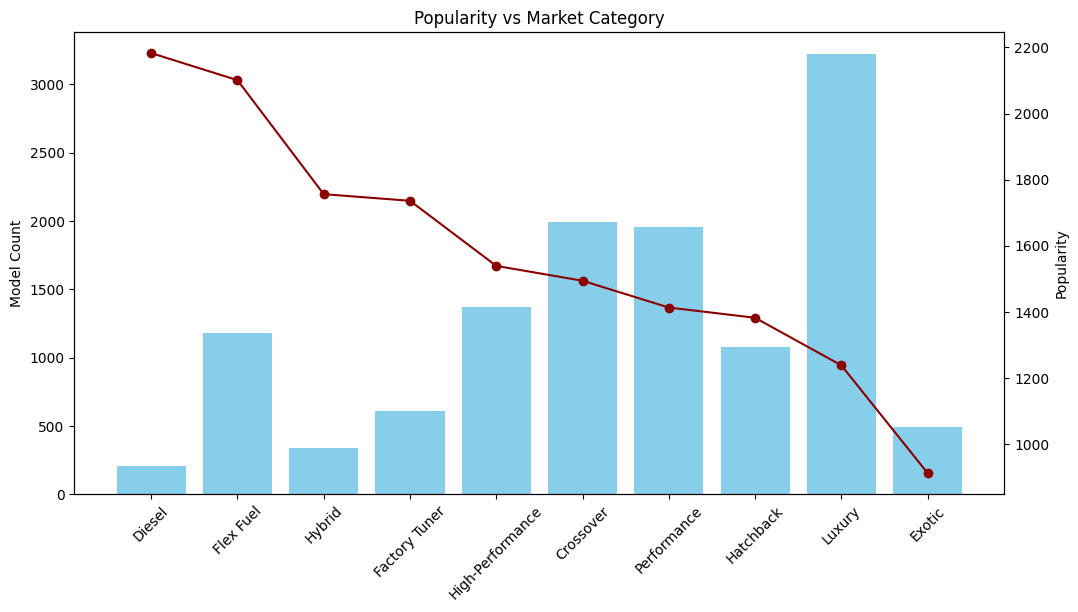

In [10]:
# Combo chart for Popularity vs Model Count by Model Category

fig, ax1 = plt.subplots(figsize=(12,6))

# Bar chart: model count
ax1.bar(pivot_1['Market Category'], pivot_1['Model Count'], color='skyblue')
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylabel('Model Count')

# Line chart: average popularity
ax2 = ax1.twinx() # add second Y-axis for dual axes
ax2.plot(pivot_1['Market Category'], pivot_1['Average Popularity'], color='darkred', marker='o')
ax2.set_ylabel('Popularity')

plt.title('Popularity vs Market Category')
plt.show()

* **How does the brand affect the price?**

In [11]:
# Average Price of Car Brands

brand_price = car_data.groupby('Make')['MSRP'].agg('mean').round(2)
brand_price = brand_price.sort_values(ascending=False)
brand_price = brand_price.reset_index(name='Average Brand Price')

brand_price.head()

,Make,Average Brand Price
0,Bugatti,1757223.67
1,Maybach,546221.88
2,Rolls-Royce,351130.65
3,Lamborghini,331567.31
4,Bentley,247169.32


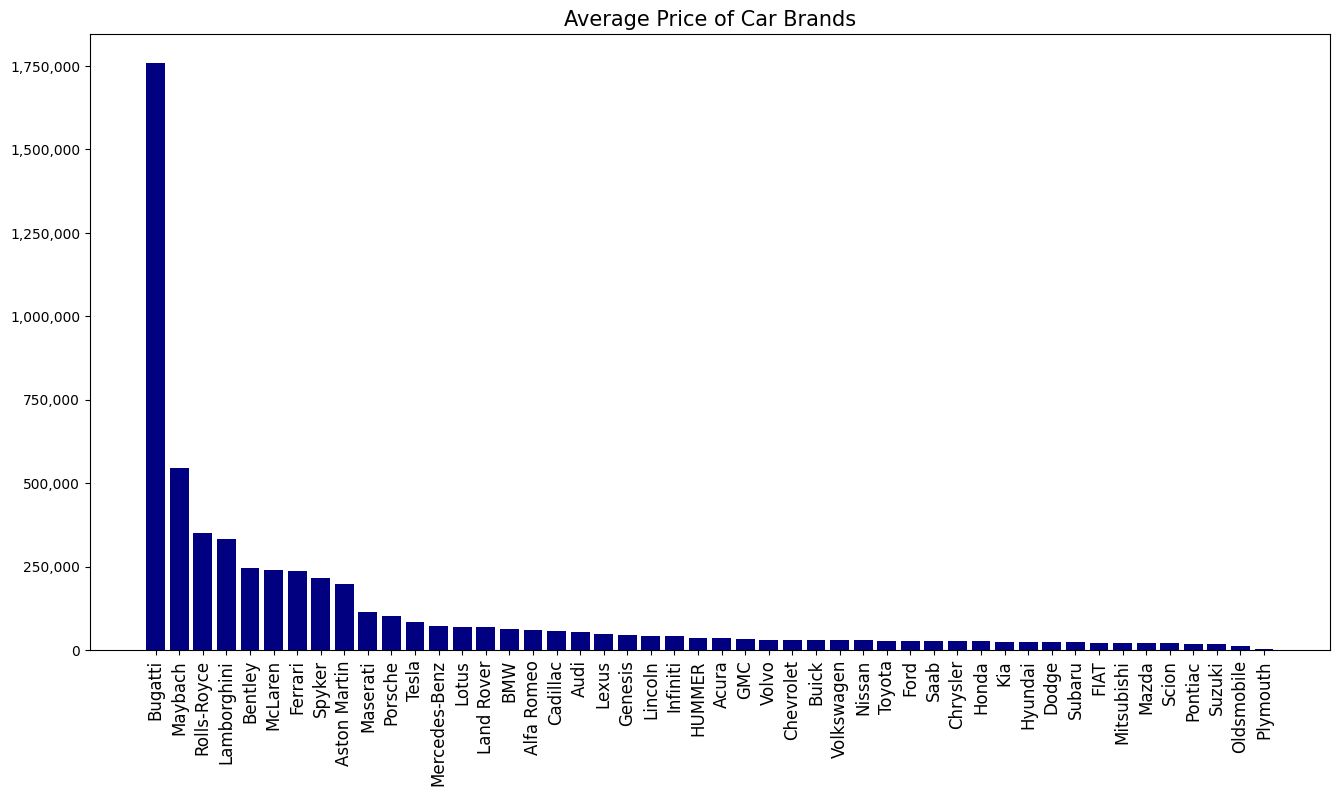

In [12]:
# Bar chart for Average Price of Car Brands

plt.figure(figsize=(16,8))

plt.bar(brand_price['Make'], brand_price['Average Brand Price'], color='navy')
plt.tick_params(axis='x', labelrotation=90, labelsize=12)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}')) # change format of y-axis tick labels from exponential to comma-separated numbers

plt.title('Average Price of Car Brands', fontsize=15)
plt.show()

* **What cars can be considered overpriced?**

In [13]:
# Compare each car’s MSRP to the average MSRP of its brand using left join

merged_data = car_data.merge(brand_price, on='Make', how='left')
price_gap = merged_data['MSRP'] - merged_data['Average Brand Price'] # calculate price difference
merged_data['Price Gap %'] = (price_gap / merged_data['Average Brand Price']) * 100 # create column for price gap in percentage
merged_data['Price Gap %'] = merged_data['Price Gap %'].round(2)

merged_data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Average Brand Price,Price Gap %
0,BMW,1 Series M,2011,premium unleaded (required),335,6,MANUAL,rear wheel drive,2,"[Factory Tuner, Luxury, High-Performance]",Compact,Coupe,26,19,3916,46135,62162.56,-25.78
1,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"[Luxury, Performance]",Compact,Convertible,28,19,3916,40650,62162.56,-34.61
2,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"[Luxury, High-Performance]",Compact,Coupe,28,20,3916,36350,62162.56,-41.52
3,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,"[Luxury, Performance]",Compact,Coupe,28,18,3916,29450,62162.56,-52.62
4,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,[Luxury],Compact,Convertible,28,18,3916,34500,62162.56,-44.50


In [14]:
# Setting 20% Price Gap threshold filter to determine whether a car is overpriced (op)

op = merged_data[merged_data['Price Gap %'] > 20].copy()
op['Car'] = op['Make'] + " " + op['Model']
op = op.groupby('Car')[['MSRP', 'Average Brand Price', 'Price Gap %']].agg('mean')
op = op.sort_values(by='Price Gap %',ascending=False).round(2).reset_index()

op.head()

,Car,MSRP,Average Brand Price,Price Gap %
0,Plymouth Prowler,28543.67,3296.87,765.78
1,Lexus LFA,375000.00,47549.07,688.66
2,Mercedes-Benz SLR McLaren,490000.00,72069.53,579.90
3,Ford GT,149995.00,28511.31,426.09
4,Lamborghini Reventon,1500000.00,331567.31,352.40


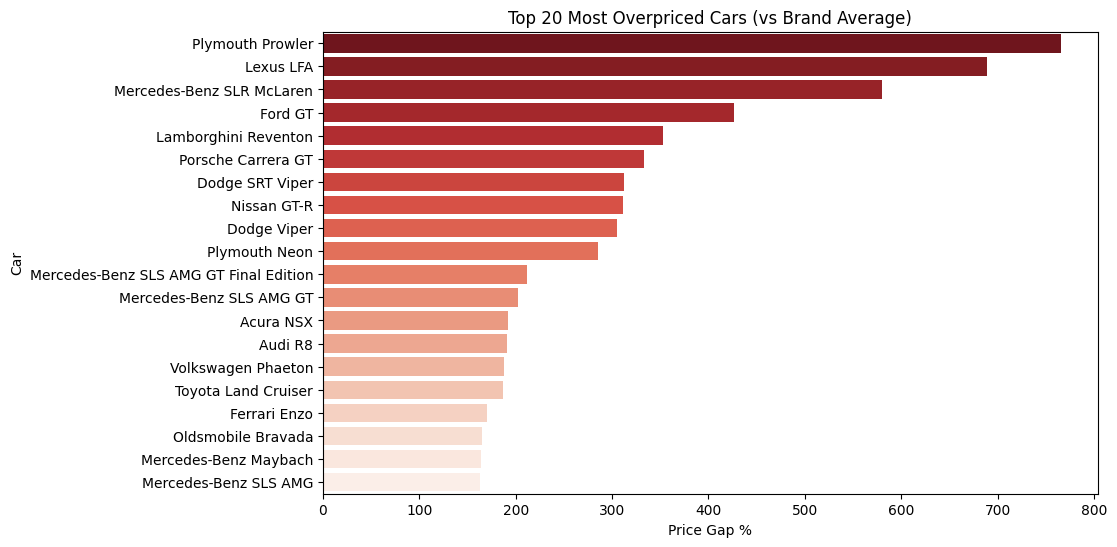

In [15]:
# Bar chart for Top 20 overpriced cars

plt.figure(figsize=(10,6))

top_op = op.head(20)
sns.barplot(data=top_op, x='Price Gap %', y='Car', palette='Reds_r')

plt.title('Top 20 Most Overpriced Cars (vs Brand Average)')
plt.show()

* **Relationship of Price with Popularity and Engine HP**

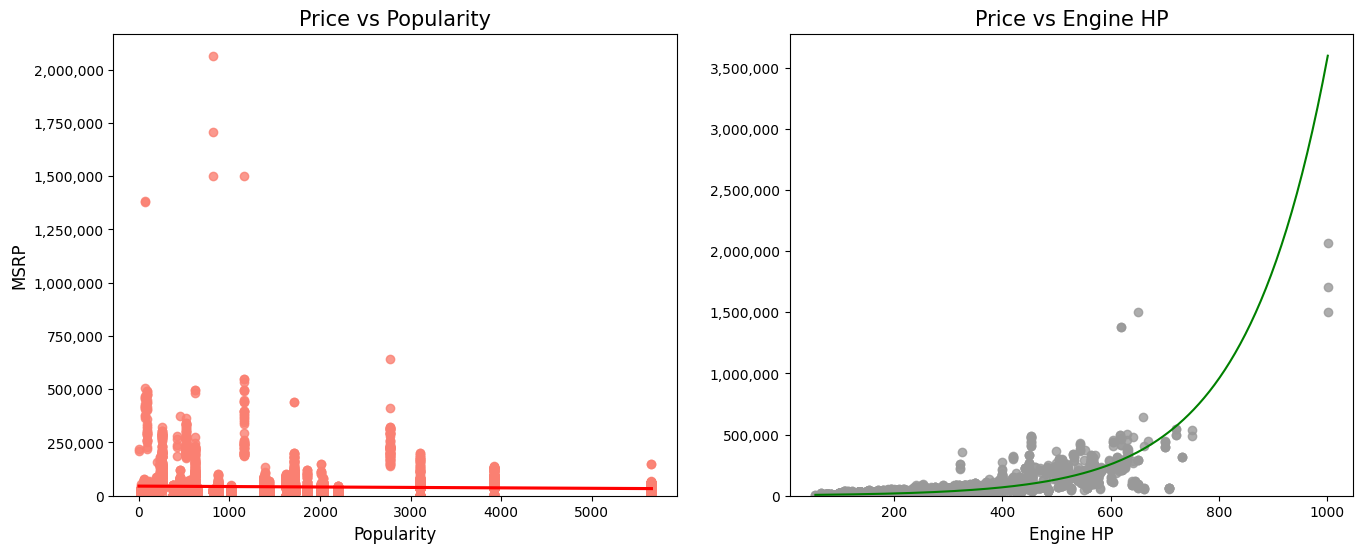

In [16]:
# Scatter plot comparison for relationship of Price with Popularity and Engine HP

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# First subplot - Price vs Popularity

sns.regplot(
    data=car_data,
    x='Popularity', y='MSRP',
    ax=axes[0],
    line_kws={'color': 'red'},
    scatter_kws={'color': 'salmon'}
)

axes[0].set_title('Price vs Popularity', size=15)
axes[0].set_xlabel('Popularity', size=12)
axes[0].set_ylabel('MSRP', size=12)
axes[0].set_ylim(bottom=0)

# Second subplot trendline calculation

x = car_data['Engine HP']
y = car_data['MSRP']
mask = (x > 0) & (y > 0)  # remove 0s to avoid log errors

x = x[mask]
y = y[mask]
log_y = np.log(y)

# Fit exponential trendline manually: y = a * exp(bx) to ln(y) = ln(a) + bx

b, log_a = np.polyfit(x, log_y, 1)
a = np.exp(log_a)
x_fit = np.linspace(x.min(), x.max(), 200)
y_fit = a * np.exp(b * x_fit)

# Second subplot - Price vs Engine HP

sns.regplot(
    data=car_data,
    x='Engine HP', y='MSRP',
    ax=axes[1],
    fit_reg=False,
    scatter_kws={'color': '#999999'}
)

axes[1].plot(x_fit, y_fit, color='green')
axes[1].set_title('Price vs Engine HP', size=15)
axes[1].set_xlabel('Engine HP', size=12)
axes[1].set_ylabel('')
axes[1].set_ylim(bottom=0)

# Change format of y-axis tick labels from exponential to comma-separated numbers

axes[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
axes[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()

# Key Insights

* **Popularity vs Market Category** : Diesel Cars, despite having the fewest models in this dataset, are the most popular by average interest. In contrast, luxury cars are the most common but not as popular, while exotic cars have the lowest popularity overall. This suggests that practical car types attract broader public interest, while luxury and exotic models cater to niche markets.

* **Brand vs Price** : Bugatti holds the highest average MSRP in the dataset, driven by the luxury pricing of its hypercar, Veyron 16.4.

* **Overpriced Cars** : The most overpriced cars by percentage gap are often high-end models from otherwise moderately priced brands. By comparing individual MSRPs to their brand's average, cars like the Plymouth Prowler and Lexus LFA appear at the top due to their standout pricing within models that typically have lower average MSRPs. Mercedes-Benz appears most frequently in the overpriced list, reflecting its wide price range across models.

* **Price vs Popularity and Engine HP** : There appears to be no strong linear relationship between popularity and MSRP — some highly popular cars are moderately priced, and some expensive cars are less popular. On the other hand, there is a positive correlation between engine HP and price — likely driven by performance premiums in higher-end models.